In [1]:
#Import libraries
import os
import pydicom
import numpy as np
import keras
from sklearn.model_selection import train_test_split, StratifiedKFold
import matplotlib.pyplot as plt
#Import own utilities
import net3d_model as model_3d
import utils
import keraOverlay as overlay


/home/yuan/Software/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# Load data and masks as dicom files
data_dir = '../../data'                   #Please change the path accordingly before make any changes
normalNames = data_dir + '/GoodData_256auto.txt'
img_dir = data_dir + '/256Auto/images'
msk_dir = data_dir + '/256Auto/masks'

In [26]:
#Define the size of the input image
n_slices = 64
size = 64
#model, prediction = model_3d.conv_net(size=size, activation_type="sigmoid", n_slices=n_slices, depth=5, n_base_filters=16)
model, prediction = model_3d.simple_unet(n_slices, size)
#model.summary()
model.compile(loss=overlay.dice_coef_loss, optimizer='adam', metrics=[overlay.dice_coef])

In [6]:
#Load data names that is okay to use
normal_namelist = []
with open(normalNames) as f:
    content = f.readlines()
    normal_namelist = [x.strip() for x in content] 

In [7]:
#Set Cross Validation parameters
#n_data = len(normal_namelist)  #define number of data to be used (use all data if len(normal_namelist)
n_data = 10
k = 5   #Number of folds
n_batch = 1 #Number of batches
data_name_list = normal_namelist[:n_data]
folds = list(StratifiedKFold(n_splits=k, shuffle=True, random_state=1).split(np.array(data_name_list), np.zeros(n_data)))

In [27]:
#Training
epochs = 2
patience = 5  #number of epochs that is tolerated if no improvement
sigma = 1.0   #Gaussian sigma parameter for smooth input image (not mask) before padding/scaling down

for index in range(k):
    print(index+1, "/", k, "fold")
    train_list = [data_name_list[i] for i in folds[index][0]]
    val_list = [data_name_list[i] for i in folds[index][1]]
    
    history = model.fit_generator(overlay.generate_batch_data(img_dir, msk_dir, train_list, batch_size=n_batch, scaling=4, smooth=sigma), 
                                  epochs=epochs, verbose=1, steps_per_epoch=len(train_list)/n_batch,
                                  validation_data=overlay.generate_batch_data(img_dir, msk_dir, val_list, batch_size=1, scaling=4, smooth=sigma),
                                  validation_steps=len(val_list),
                                  callbacks=overlay.get_callbacks('Scale_down64.h5', early_stopping_patience=patience))


1 / 5 fold


Epoch 1/2


1/8 [==>...........................] - ETA: 37s - loss: 0.9995 - dice_coef: 4.8130e-04

2/8 [======>.......................] - ETA: 25s - loss: 0.9979 - dice_coef: 0.0021    

3/8 [==========>...................] - ETA: 18s - loss: 0.9942 - dice_coef: 0.0058

4/8 [==============>...............] - ETA: 13s - loss: 0.9946 - dice_coef: 0.0054

5/8 [=================>............] - ETA: 9s - loss: 0.9950 - dice_coef: 0.0050 

6/8 [=====================>........] - ETA: 6s - loss: 0.9954 - dice_coef: 0.0046

7/8 [=========================>....] - ETA: 3s - loss: 0.9956 - dice_coef: 0.0044

8/8 [==============================] - 27s 3s/step - loss: 0.9957 - dice_coef: 0.0043 - val_loss: 0.9975 - val_dice_coef: 0.0025


Epoch 2/2


1/8 [==>...........................] - ETA: 21s - loss: 0.9974 - dice_coef: 0.0026

2/8 [======>.......................] - ETA: 18s - loss: 0.9970 - dice_coef: 0.0030

3/8 [==========>...................] - ETA: 16s - loss: 0.9964 - dice_coef: 0.0036

4/8 [==============>...............] - ETA: 12s - loss: 0.9964 - dice_coef: 0.0036

5/8 [=================>............] - ETA: 9s - loss: 0.9939 - dice_coef: 0.0061 

6/8 [=====================>........] - ETA: 6s - loss: 0.9943 - dice_coef: 0.0057

7/8 [=========================>....] - ETA: 3s - loss: 0.9944 - dice_coef: 0.0056

8/8 [==============================] - 28s 3s/step - loss: 0.9946 - dice_coef: 0.0054 - val_loss: 0.9966 - val_dice_coef: 0.0034


2 / 5 fold
Epoch 1/2


1/8 [==>...........................] - ETA: 32s - loss: 0.9971 - dice_coef: 0.0029

2/8 [======>.......................] - ETA: 26s - loss: 0.9959 - dice_coef: 0.0041

3/8 [==========>...................] - ETA: 21s - loss: 0.9942 - dice_coef: 0.0058

4/8 [==============>...............] - ETA: 15s - loss: 0.9911 - dice_coef: 0.0089

5/8 [=================>............] - ETA: 11s - loss: 0.9921 - dice_coef: 0.0079

6/8 [=====================>........] - ETA: 7s - loss: 0.9927 - dice_coef: 0.0073 

7/8 [=========================>....] - ETA: 3s - loss: 0.9932 - dice_coef: 0.0068

8/8 [==============================] - 32s 4s/step - loss: 0.9933 - dice_coef: 0.0067 - val_loss: 0.9979 - val_dice_coef: 0.0021


Epoch 2/2


1/8 [==>...........................] - ETA: 23s - loss: 0.9806 - dice_coef: 0.0194

2/8 [======>.......................] - ETA: 19s - loss: 0.9887 - dice_coef: 0.0113

3/8 [==========>...................] - ETA: 15s - loss: 0.9911 - dice_coef: 0.0089

4/8 [==============>...............] - ETA: 12s - loss: 0.9907 - dice_coef: 0.0093

5/8 [=================>............] - ETA: 9s - loss: 0.9913 - dice_coef: 0.0087 

6/8 [=====================>........] - ETA: 6s - loss: 0.9917 - dice_coef: 0.0083

7/8 [=========================>....] - ETA: 3s - loss: 0.9923 - dice_coef: 0.0077

8/8 [==============================] - 29s 4s/step - loss: 0.9927 - dice_coef: 0.0073 - val_loss: 0.9981 - val_dice_coef: 0.0019


3 / 5 fold
Epoch 1/2


1/8 [==>...........................] - ETA: 32s - loss: 0.9938 - dice_coef: 0.0062

2/8 [======>.......................] - ETA: 26s - loss: 0.9914 - dice_coef: 0.0086

3/8 [==========>...................] - ETA: 20s - loss: 0.9921 - dice_coef: 0.0079

4/8 [==============>...............] - ETA: 15s - loss: 0.9929 - dice_coef: 0.0071

5/8 [=================>............] - ETA: 11s - loss: 0.9935 - dice_coef: 0.0065

6/8 [=====================>........] - ETA: 7s - loss: 0.9938 - dice_coef: 0.0062 

7/8 [=========================>....] - ETA: 3s - loss: 0.9940 - dice_coef: 0.0060

8/8 [==============================] - 31s 4s/step - loss: 0.9939 - dice_coef: 0.0061 - val_loss: 0.9961 - val_dice_coef: 0.0039


Epoch 2/2


1/8 [==>...........................] - ETA: 23s - loss: 0.9883 - dice_coef: 0.0117

2/8 [======>.......................] - ETA: 19s - loss: 0.9919 - dice_coef: 0.0081

3/8 [==========>...................] - ETA: 15s - loss: 0.9930 - dice_coef: 0.0070

4/8 [==============>...............] - ETA: 12s - loss: 0.9935 - dice_coef: 0.0065

5/8 [=================>............] - ETA: 9s - loss: 0.9934 - dice_coef: 0.0066 

6/8 [=====================>........] - ETA: 6s - loss: 0.9932 - dice_coef: 0.0068

7/8 [=========================>....] - ETA: 3s - loss: 0.9932 - dice_coef: 0.0068

8/8 [==============================] - 28s 3s/step - loss: 0.9934 - dice_coef: 0.0066 - val_loss: 0.9987 - val_dice_coef: 0.0013


4 / 5 fold
Epoch 1/2


1/8 [==>...........................] - ETA: 30s - loss: 0.9961 - dice_coef: 0.0039

2/8 [======>.......................] - ETA: 24s - loss: 0.9917 - dice_coef: 0.0083

3/8 [==========>...................] - ETA: 20s - loss: 0.9864 - dice_coef: 0.0136

4/8 [==============>...............] - ETA: 15s - loss: 0.9879 - dice_coef: 0.0121

5/8 [=================>............] - ETA: 11s - loss: 0.9893 - dice_coef: 0.0107

6/8 [=====================>........] - ETA: 7s - loss: 0.9902 - dice_coef: 0.0098 

7/8 [=========================>....] - ETA: 3s - loss: 0.9909 - dice_coef: 0.0091

8/8 [==============================] - 30s 4s/step - loss: 0.9910 - dice_coef: 0.0090 - val_loss: 0.9971 - val_dice_coef: 0.0029


Epoch 2/2


1/8 [==>...........................] - ETA: 22s - loss: 0.9946 - dice_coef: 0.0054

2/8 [======>.......................] - ETA: 19s - loss: 0.9946 - dice_coef: 0.0054

3/8 [==========>...................] - ETA: 15s - loss: 0.9937 - dice_coef: 0.0063

4/8 [==============>...............] - ETA: 12s - loss: 0.9942 - dice_coef: 0.0058

5/8 [=================>............] - ETA: 9s - loss: 0.9926 - dice_coef: 0.0074 

6/8 [=====================>........] - ETA: 6s - loss: 0.9929 - dice_coef: 0.0071

7/8 [=========================>....] - ETA: 3s - loss: 0.9926 - dice_coef: 0.0074

8/8 [==============================] - 27s 3s/step - loss: 0.9901 - dice_coef: 0.0099 - val_loss: 0.9976 - val_dice_coef: 0.0024


5 / 5 fold
Epoch 1/2


1/8 [==>...........................] - ETA: 29s - loss: 0.9954 - dice_coef: 0.0046

2/8 [======>.......................] - ETA: 28s - loss: 0.9935 - dice_coef: 0.0065

3/8 [==========>...................] - ETA: 23s - loss: 0.9907 - dice_coef: 0.0093

4/8 [==============>...............] - ETA: 18s - loss: 0.9859 - dice_coef: 0.0141

5/8 [=================>............] - ETA: 13s - loss: 0.9870 - dice_coef: 0.0130

6/8 [=====================>........] - ETA: 8s - loss: 0.9881 - dice_coef: 0.0119 

7/8 [=========================>....] - ETA: 4s - loss: 0.9889 - dice_coef: 0.0111

8/8 [==============================] - 38s 5s/step - loss: 0.9891 - dice_coef: 0.0109 - val_loss: 0.9975 - val_dice_coef: 0.0025


Epoch 2/2


1/8 [==>...........................] - ETA: 28s - loss: 0.9937 - dice_coef: 0.0063

2/8 [======>.......................] - ETA: 23s - loss: 0.9922 - dice_coef: 0.0078

3/8 [==========>...................] - ETA: 19s - loss: 0.9915 - dice_coef: 0.0085

4/8 [==============>...............] - ETA: 15s - loss: 0.9895 - dice_coef: 0.0105

5/8 [=================>............] - ETA: 11s - loss: 0.9906 - dice_coef: 0.0094

6/8 [=====================>........] - ETA: 7s - loss: 0.9910 - dice_coef: 0.0090 

7/8 [=========================>....] - ETA: 3s - loss: 0.9909 - dice_coef: 0.0091

8/8 [==============================] - 33s 4s/step - loss: 0.9881 - dice_coef: 0.0119 - val_loss: 0.9961 - val_dice_coef: 0.0039


In [12]:
#Load data to check first as lists
#from imp import reload
#reload(utils)
x_list, y_list = utils.load_data(img_dir, msk_dir, data_name_list, padding=True, sigma_image=sigma, scaling=4, OPaslist=True)

10


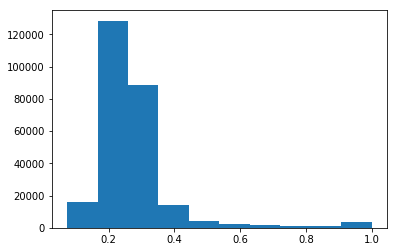

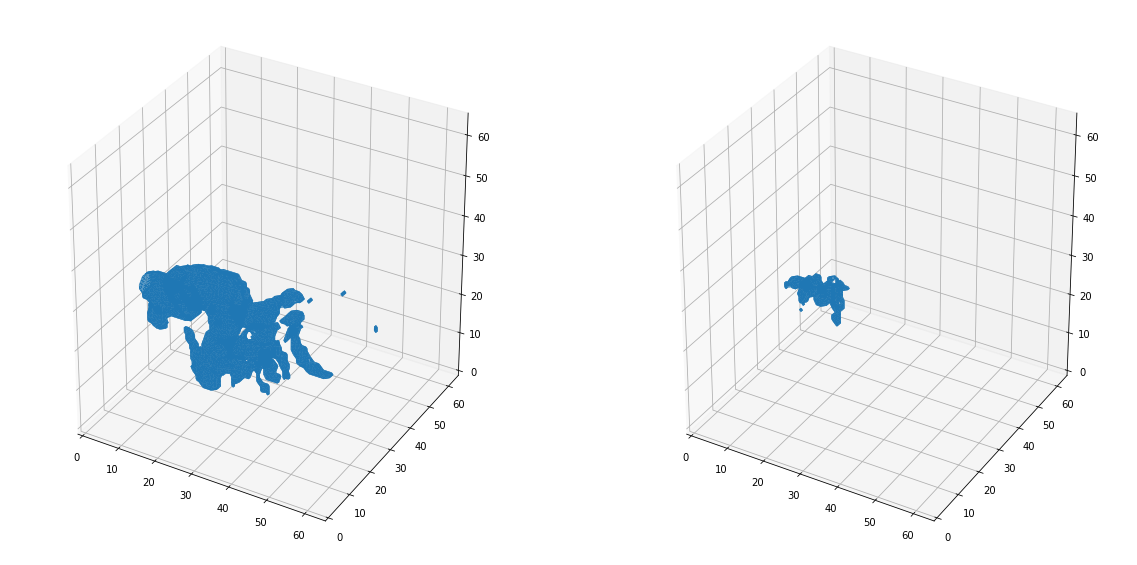

In [29]:
#predict one data and visualize
n_slice = 64
size = 64
print(len(x_list))
index = 9
confidence = 0.9

mask = y_list[index]
prediction = model.predict(x_list[index].reshape(1,n_slice,size,size,1), steps=1)
plt.hist(prediction.flatten())

prediction[prediction>=confidence] = 1
prediction[prediction<confidence] = 0
utils.plot_3d(np.squeeze(prediction), y_list[index], threshold=0.5, threshold2=0.5)

In [30]:
from keras import backend

dice = overlay.dice_coef(mask[np.newaxis,...],prediction[0])

backend.eval(dice)

0.17288528

ValueError: Invalid reduction dimension 3 for input with 3 dimensions. for 'Sum' (op: 'Sum') with input shapes: [64,64,64], [3] and with computed input tensors: input[1] = <1 2 3>.